In [1]:
import pandas as pd


columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']

df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', 
                 sep='\t',
                 usecols=columns)

df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [2]:
df.shape

(2930, 6)

In [3]:
df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})

In [4]:
df.dropna(inplace=True)
df.shape

(2929, 6)

(<Figure size 1200x1000 with 36 Axes>,
 array([[<Axes: xlabel='Overall Qual', ylabel='Count'>, <Axes: >,
         <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: xlabel='Overall Cond', ylabel='Overall Qual'>,
         <Axes: xlabel='Overall Cond', ylabel='Count'>, <Axes: >,
         <Axes: >, <Axes: >, <Axes: >],
        [<Axes: xlabel='Total Bsmt SF', ylabel='Overall Qual'>,
         <Axes: xlabel='Total Bsmt SF', ylabel='Overall Cond'>,
         <Axes: xlabel='Total Bsmt SF', ylabel='Count'>, <Axes: >,
         <Axes: >, <Axes: >],
        [<Axes: xlabel='Central Air', ylabel='Overall Qual'>,
         <Axes: xlabel='Central Air', ylabel='Overall Cond'>,
         <Axes: xlabel='Central Air', ylabel='Total Bsmt SF'>,
         <Axes: xlabel='Central Air', ylabel='Count'>, <Axes: >, <Axes: >],
        [<Axes: xlabel='Gr Liv Area', ylabel='Overall Qual'>,
         <Axes: xlabel='Gr Liv Area', ylabel='Overall Cond'>,
         <Axes: xlabel='Gr Liv Area', ylabel='Total Bsmt SF'>,
 

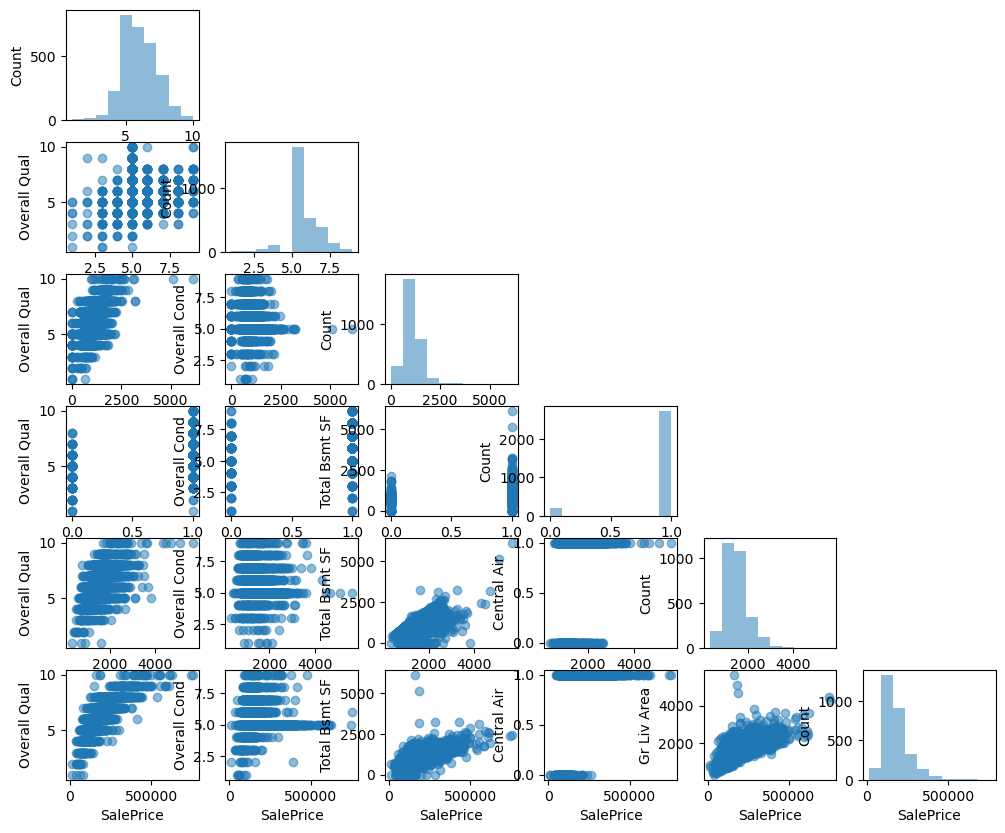

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix, heatmap
scatterplotmatrix(df.values,
                  figsize=(12, 10),
                  names=df.columns,
                  alpha=0.5)


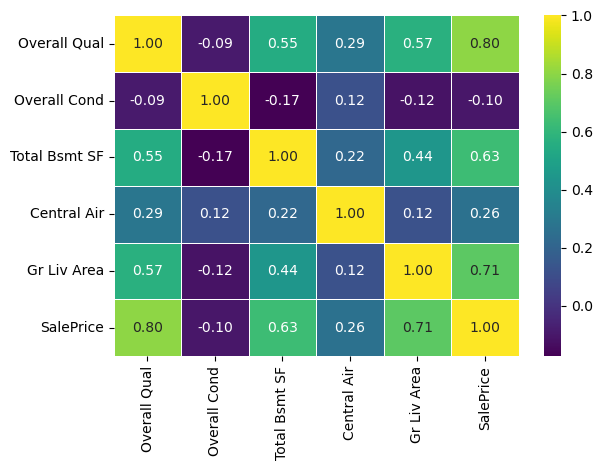

In [13]:
import seaborn as sns
cm = df.corr().values
hm = sns.heatmap(cm, annot=True, cmap='viridis', fmt=".2f", linewidths=.5
                 , yticklabels=df.columns, xticklabels=df.columns)   
plt.tight_layout()

Intercept: 13342.978662355132
Coefficient: [111.66625842]


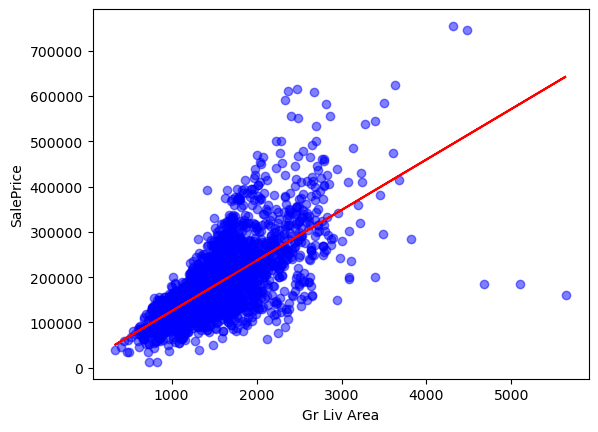

In [14]:
class simple_LinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X_b = np.c_[np.ones(X.shape[0]), X]
        theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        self.intercept_ = theta_best[0]
        self.coef_ = theta_best[1:]

    def predict(self, X):
        if self.coef_ is None or self.intercept_ is None:
            raise Exception("Model is not fitted yet.")
        X_b = np.c_[np.ones(X.shape[0]), X]

        return X_b.dot(np.r_[self.intercept_, self.coef_])
OLS_LR = simple_LinearRegression()
OLS_LR.fit(df[['Gr Liv Area']].values, df['SalePrice'].values)
print("Intercept:", OLS_LR.intercept_)
print("Coefficient:", OLS_LR.coef_)
plt.scatter(df[['Gr Liv Area']].values, df['SalePrice'].values, color='blue', alpha=0.5)
plt.plot(df[['Gr Liv Area']].values, OLS_LR.predict(df[['Gr Liv Area']].values), color='red')
plt.xlabel('Gr Liv Area')
plt.ylabel('SalePrice')
plt.show()


Intercept (sklearn): 13342.978662355395
Coefficient (sklearn): [111.66625842]


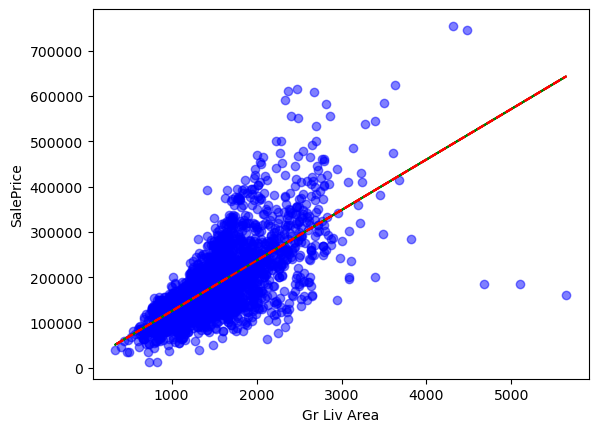

In [12]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(df[['Gr Liv Area']], df['SalePrice'])
print("Intercept (sklearn):", slr.intercept_)
print("Coefficient (sklearn):", slr.coef_)
plt.scatter(df[['Gr Liv Area']].values, df['SalePrice'].values, color='blue', alpha=0.5)
plt.plot(df[['Gr Liv Area']].values, slr.predict(df[['Gr Liv Area']]), color='green')
plt.plot(df[['Gr Liv Area']].values, OLS_LR.predict(df[['Gr Liv Area']].values), color='red', linestyle='dashed')
plt.xlabel('Gr Liv Area')
plt.ylabel('SalePrice')
plt.show()

/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RANSACRegressor was fitted with feature names
  warnings.warn(


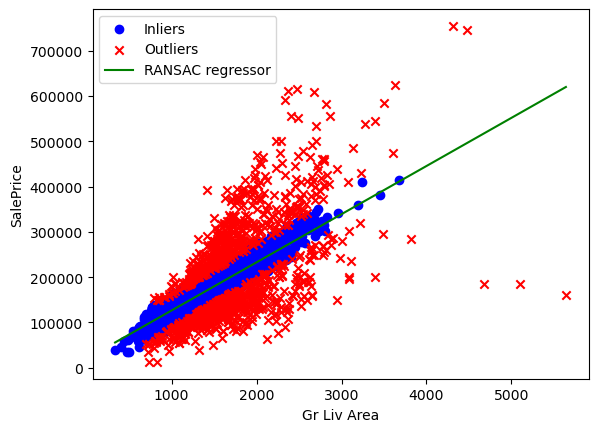

In [ ]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(), min_samples=0.95, residual_threshold=None, random_state=123)
ransac.fit(df[['Gr Liv Area']], df['SalePrice'])

# The threshold between inliner and outlier masks is median absolute deviation (MAD).

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(df['Gr Liv Area'].min(), df['Gr Liv Area'].max()).reshape(-1, 1)
line_y_ransac = ransac.predict(line_X)
plt.scatter(df.loc[inlier_mask, 'Gr Liv Area'], df.loc[inlier_mask, 'SalePrice'], color='blue', marker='o', label='Inliers')
plt.scatter(df.loc[outlier_mask, 'Gr Liv Area'], df.loc[outlier_mask, 'SalePrice'], color='red', marker='x', label='Outliers')
plt.plot(line_X, line_y_ransac, color='green', label='RANSAC regressor')
plt.xlabel('Gr Liv Area')
plt.ylabel('SalePrice')
plt.legend()
plt.show()


In [16]:
def median_absolute_deviation(data):
    return np.median(np.abs(data - np.median(data)))
median_absolute_deviation(df['SalePrice'])

np.float64(37000.0)

In [19]:
from sklearn.model_selection import train_test_split


target = 'SalePrice'
features = df.columns[df.columns != target]

X = df[features].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123)
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_base.py:288: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_base.py:288: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_base.py:288: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_base.py:288: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_base.py:288: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_base.py:288: RuntimeWarning: invalid value encountered

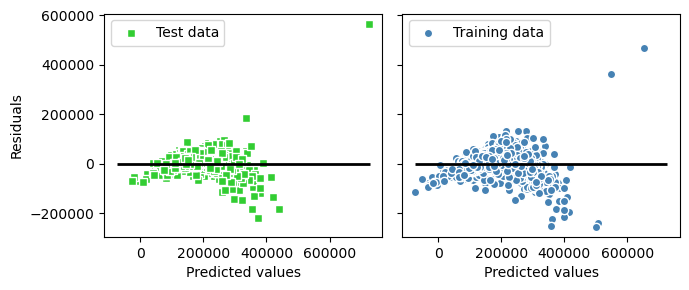

In [20]:
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

ax1.scatter(y_test_pred, y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
ax2.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
ax1.set_ylabel('Residuals')

for ax in (ax1, ax2):
    ax.set_xlabel('Predicted values')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100, color='black', lw=2)

plt.tight_layout()

#plt.savefig('figures/09_11.png', dpi=300)
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE train: {mse_train:.2f}')
print(f'MSE test: {mse_test:.2f}')
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'MAE train: {mae_train:.2f}')
print(f'MAE test: {mae_test:.2f}')

r2_train = r2_score(y_train, y_train_pred)
r2_test =r2_score(y_test, y_test_pred)
print(f'R^2 train: {r2_train:.2f}')
print(f'R^2 test: {r2_test:.2f}')

MSE train: 1497216245.85
MSE test: 1516565821.00
MAE train: 25983.03
MAE test: 24921.29
R^2 train: 0.77
R^2 test: 0.75


In [25]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
print(ridge.coef_)
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)
elanet.fit(X_train, y_train)
y_train_pred = elanet.predict(X_train)
y_test_pred = elanet.predict(X_test)
print(elanet.coef_)

[26251.38276394   804.70816337    41.94651964 11364.80761309
    55.67855548]
[26244.18747173   808.42207733    41.96655463 11295.65711198
    55.68798828]
[18517.39711659  1036.62834166    52.97289651  1999.58929225
    64.5466281 ]


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_base.py:288: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_base.py:288: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_base.py:288: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_base.py:288: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_base.py:288: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_base.py:288: RuntimeWarning: invalid value encountered

In [30]:
from sklearn.preprocessing import PolynomialFeatures
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])\
             [:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

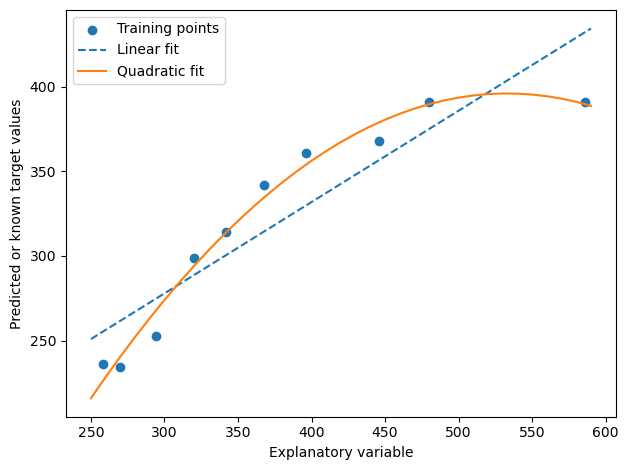

In [31]:
# fit linear features
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# fit quadratic features
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

# plot results
plt.scatter(X, y, label='Training points')
plt.plot(X_fit, y_lin_fit, label='Linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='Quadratic fit')
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/09_12.png', dpi=300)
plt.show()

In [32]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

In [33]:
mse_lin = mean_squared_error(y, y_lin_pred)
mse_quad = mean_squared_error(y, y_quad_pred)
print(f'Training MSE linear: {mse_lin:.3f}'
      f', quadratic: {mse_quad:.3f}')


r2_lin = r2_score(y, y_lin_pred)
r2_quad = r2_score(y, y_quad_pred)
print(f'Training R^2 linear: {r2_lin:.3f}'
      f', quadratic: {r2_quad:.3f}')

Training MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_base.py:288: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_base.py:288: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_base.py:288: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_base.py:288: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_base.py:288: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_base.py:288: RuntimeWarning: invalid value encountered

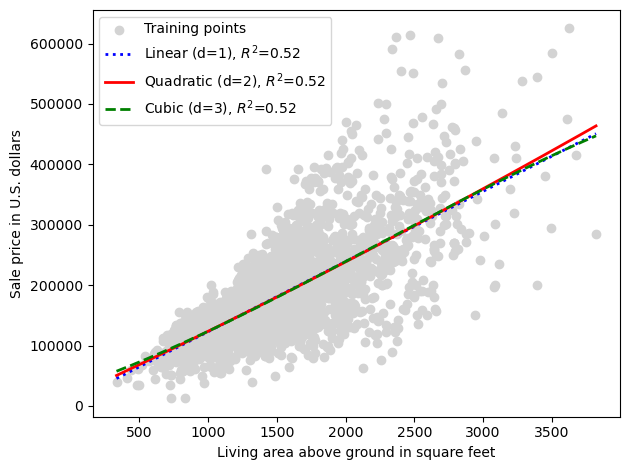

In [35]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

X = X[(df['Gr Liv Area'] < 4000)]
y = y[(df['Gr Liv Area'] < 4000)]


regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features
X_fit = np.arange(X.min()-1, X.max()+2, 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# plot results
plt.scatter(X, y, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label=f'Linear (d=1), $R^2$={linear_r2:.2f}',
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label=f'Quadratic (d=2), $R^2$={quadratic_r2:.2f}',
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label=f'Cubic (d=3), $R^2$={cubic_r2:.2f}',
         color='green', 
         lw=2,
         linestyle='--')


plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')

plt.tight_layout()

plt.show()

/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_base.py:288: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_base.py:288: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_base.py:288: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_base.py:288: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_base.py:288: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_base.py:288: RuntimeWarning: invalid value encountered

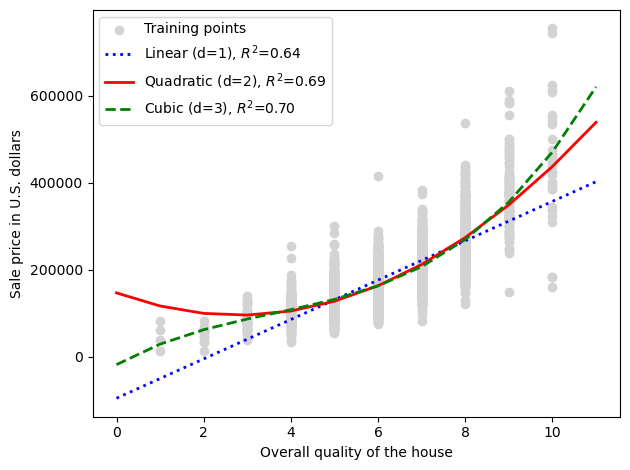

In [36]:
X = df[['Overall Qual']].values
y = df['SalePrice'].values


regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features
X_fit = np.arange(X.min()-1, X.max()+2, 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# plot results
plt.scatter(X, y, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label=f'Linear (d=1), $R^2$={linear_r2:.2f}',
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label=f'Quadratic (d=2), $R^2$={quadratic_r2:.2f}',
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label=f'Cubic (d=3), $R^2$={cubic_r2:.2f}',
         color='green', 
         lw=2,
         linestyle='--')


plt.xlabel('Overall quality of the house')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/09_14.png', dpi=300)
plt.show()

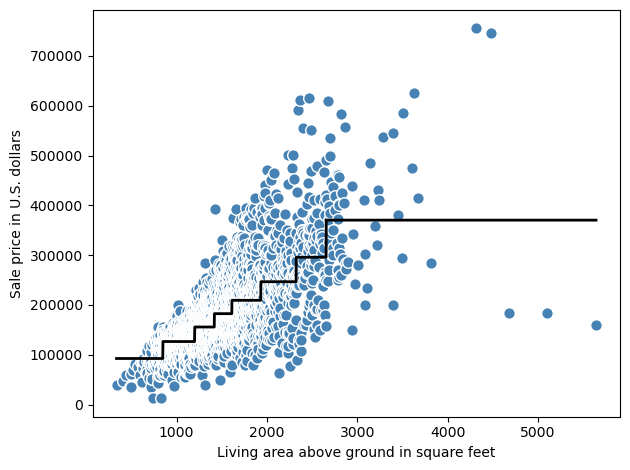

In [48]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 
from sklearn.tree import DecisionTreeRegressor


X = df[['Gr Liv Area']].values
y = df['SalePrice'].values



tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)
sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')

plt.tight_layout()
#plt.savefig('figures/09_15.png', dpi=300)
plt.show()

In [49]:
tree_r2 = r2_score(y, tree.predict(X))
tree_r2

0.5144569334885711

In [50]:
target = 'SalePrice'
features = df.columns[df.columns != target]

X = df[features].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123)

In [51]:
from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='squared_error', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)


mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'MAE train: {mae_train:.2f}')
print(f'MAE test: {mae_test:.2f}')


r2_train = r2_score(y_train, y_train_pred)
r2_test =r2_score(y_test, y_test_pred)
print(f'R^2 train: {r2_train:.2f}')
print(f'R^2 test: {r2_test:.2f}')

MAE train: 8305.26
MAE test: 20823.86
R^2 train: 0.98
R^2 test: 0.85


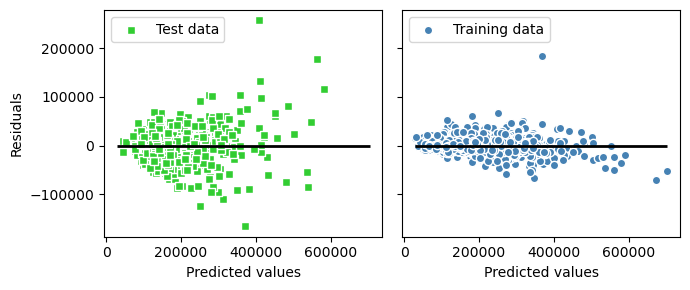

In [43]:
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

ax1.scatter(y_test_pred, y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
ax2.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
ax1.set_ylabel('Residuals')

for ax in (ax1, ax2):
    ax.set_xlabel('Predicted values')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100, color='black', lw=2)

plt.tight_layout()

#plt.savefig('figures/09_16.png', dpi=300)
plt.show()